In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [14]:
df_boston_housing = pd.read_csv('boston housing.csv')
df_boston_housing.head()

,0.000000000000000000e+00,1.799999999999999933e-01,6.781524926686217924e-02,0.000000000000000000e+00.1,3.148148148148147696e-01,5.775052692086607431e-01,6.416065911431514390e-01,2.692031390664641477e-01,0.000000000000000000e+00.2,2.080152671755724492e-01,...,5.974906610362189924e-02,2.080152671755724214e-01,1.865479079251132835e-02,8.250339520144869820e-02,2.872340425531915709e-01,2.575912357334086619e-02,9.999999999999997780e-01,8.967991169977924948e-02,8.042486562480206241e-03,2.400000000000000000e+01
0,0.000236,0.0,0.242302,0.0,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,...,0.058064,0.104962,0.021462,0.306021,0.553191,0.113111,1.000000,0.204470,0.041808,21.6
1,0.000236,0.0,0.242302,0.0,0.172840,0.694386,0.599382,0.348962,0.043478,0.104962,...,0.058064,0.103885,0.006661,0.306021,0.547514,0.035109,0.979580,0.062814,0.004028,34.7
2,0.000293,0.0,0.063050,0.0,0.150206,0.658555,0.441813,0.448545,0.086957,0.066794,...,0.043345,0.066412,0.002230,0.421118,0.645222,0.021667,0.988585,0.033197,0.001115,33.4
3,0.000705,0.0,0.063050,0.0,0.150206,0.687105,0.528321,0.448545,0.086957,0.066794,...,0.043345,0.066794,0.006635,0.421118,0.648936,0.064464,1.000000,0.099338,0.009868,36.2
4,0.000264,0.0,0.063050,0.0,0.150206,0.549722,0.574665,0.448545,0.086957,0.066794,...,0.043345,0.066326,0.006414,0.421118,0.644387,0.062315,0.986029,0.095353,0.009221,28.7


In [15]:
num_cols = df_boston_housing.shape[1]
column_names = [f'feature_{i}' for i in range(num_cols - 1)] + ['target']
df_boston_housing.columns = column_names
display(df_boston_housing.head())

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_95,feature_96,feature_97,feature_98,feature_99,feature_100,feature_101,feature_102,feature_103,target
0,0.000236,0.0,0.242302,0.0,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,...,0.058064,0.104962,0.021462,0.306021,0.553191,0.113111,1.000000,0.204470,0.041808,21.6
1,0.000236,0.0,0.242302,0.0,0.172840,0.694386,0.599382,0.348962,0.043478,0.104962,...,0.058064,0.103885,0.006661,0.306021,0.547514,0.035109,0.979580,0.062814,0.004028,34.7
2,0.000293,0.0,0.063050,0.0,0.150206,0.658555,0.441813,0.448545,0.086957,0.066794,...,0.043345,0.066412,0.002230,0.421118,0.645222,0.021667,0.988585,0.033197,0.001115,33.4
3,0.000705,0.0,0.063050,0.0,0.150206,0.687105,0.528321,0.448545,0.086957,0.066794,...,0.043345,0.066794,0.006635,0.421118,0.648936,0.064464,1.000000,0.099338,0.009868,36.2
4,0.000264,0.0,0.063050,0.0,0.150206,0.549722,0.574665,0.448545,0.086957,0.066794,...,0.043345,0.066326,0.006414,0.421118,0.644387,0.062315,0.986029,0.095353,0.009221,28.7


In [16]:
X = df_boston_housing.drop('target', axis=1)
y = df_boston_housing['target']
display(X.head())
display(y.head())

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_94,feature_95,feature_96,feature_97,feature_98,feature_99,feature_100,feature_101,feature_102,feature_103
0,0.000236,0.0,0.242302,0.0,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,...,0.011017,0.058064,0.104962,0.021462,0.306021,0.553191,0.113111,1.000000,0.204470,0.041808
1,0.000236,0.0,0.242302,0.0,0.172840,0.694386,0.599382,0.348962,0.043478,0.104962,...,0.011017,0.058064,0.103885,0.006661,0.306021,0.547514,0.035109,0.979580,0.062814,0.004028
2,0.000293,0.0,0.063050,0.0,0.150206,0.658555,0.441813,0.448545,0.086957,0.066794,...,0.004461,0.043345,0.066412,0.002230,0.421118,0.645222,0.021667,0.988585,0.033197,0.001115
3,0.000705,0.0,0.063050,0.0,0.150206,0.687105,0.528321,0.448545,0.086957,0.066794,...,0.004461,0.043345,0.066794,0.006635,0.421118,0.648936,0.064464,1.000000,0.099338,0.009868
4,0.000264,0.0,0.063050,0.0,0.150206,0.549722,0.574665,0.448545,0.086957,0.066794,...,0.004461,0.043345,0.066326,0.006414,0.421118,0.644387,0.062315,0.986029,0.095353,0.009221


0    21.6
1    34.7
2    33.4
3    36.2
4    28.7
Name: target, dtype: float64

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
display(X_train.head())
display(X_test.head())
display(y_train.head())
display(y_test.head())

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_94,feature_95,feature_96,feature_97,feature_98,feature_99,feature_100,feature_101,feature_102,feature_103
75,0.001070,0.0,0.453446,0.0,0.106996,0.520789,0.737384,0.265766,0.173913,0.402672,...,0.162145,0.261308,0.379075,0.113779,0.421118,0.610908,0.183364,0.886232,0.266002,0.079841
442,0.111950,0.0,0.646628,0.0,0.730453,0.560261,1.000000,0.077185,1.000000,0.914122,...,0.835619,0.739077,0.890680,0.431837,0.653689,0.787777,0.381945,0.949369,0.460292,0.223168
15,0.011775,0.0,0.281525,0.0,0.314815,0.454876,0.271885,0.306359,0.130435,0.229008,...,0.052444,0.204645,0.223204,0.030648,0.798551,0.870971,0.119593,0.949959,0.130439,0.017910
325,0.003340,0.0,0.253666,0.0,0.222222,0.527112,0.267765,0.389773,0.173913,0.190840,...,0.036420,0.142115,0.190840,0.023276,0.554550,0.744681,0.090825,1.000000,0.121965,0.014875
388,0.091553,0.0,0.646628,0.0,0.648148,0.350450,0.988671,0.054424,1.000000,0.914122,...,0.835619,0.739077,0.914122,0.482285,0.653689,0.808511,0.426565,1.000000,0.527594,0.278355


,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_94,feature_95,feature_96,feature_97,feature_98,feature_99,feature_100,feature_101,feature_102,feature_103
173,0.000878,0.00,0.131598,0.0,0.257202,0.440314,0.677652,0.142977,0.173913,0.208015,...,0.043270,0.088517,0.206090,0.045403,0.181077,0.421594,0.092880,0.981577,0.216247,0.047641
274,0.001008,0.40,0.218109,0.0,0.127572,0.630964,0.410917,0.285326,0.130435,0.127863,...,0.016349,0.068012,0.127863,0.004410,0.282933,0.531915,0.018347,1.000000,0.034492,0.001190
490,0.001117,0.00,1.000000,0.0,0.460905,0.464074,0.987642,0.067155,0.130435,1.000000,...,1.000000,0.797872,0.982879,0.450883,0.636600,0.784212,0.359747,0.966050,0.443163,0.203295
72,0.002125,0.00,0.379399,0.0,0.057613,0.514275,0.033986,0.378079,0.130435,0.225191,...,0.050711,0.158113,0.213988,0.036103,0.492983,0.667197,0.112565,0.902974,0.152344,0.025703
305,0.000772,0.33,0.063050,0.0,0.179012,0.739414,0.710608,0.179105,0.260870,0.066794,...,0.004461,0.041213,0.066794,0.008736,0.380715,0.617021,0.080703,1.000000,0.130795,0.017107


75     20.0
442    15.4
15     23.1
325    23.0
388    11.5
Name: target, dtype: float64

173    22.6
274    32.0
490    13.6
72     23.4
305    33.4
Name: target, dtype: float64

In [18]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [19]:
lasso_model = Lasso()
lasso_model.fit(X_train_scaled, y_train)
y_pred_lasso = lasso_model.predict(X_test_scaled)

r2_lasso = r2_score(y_test, y_pred_lasso)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)

print(f"Lasso Regression R-squared: {r2_lasso:.4f}")
print(f"Lasso Regression MAE: {mae_lasso:.4f}")
print(f"Lasso Regression MSE: {mse_lasso:.4f}")

Lasso Regression R-squared: 0.7673
Lasso Regression MAE: 2.8487
Lasso Regression MSE: 12.9678


In [20]:
ridge_model = Ridge()
ridge_model.fit(X_train_scaled, y_train)
y_pred_ridge = ridge_model.predict(X_test_scaled)

r2_ridge = r2_score(y_test, y_pred_ridge)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)

print(f"Ridge Regression R-squared: {r2_ridge:.4f}")
print(f"Ridge Regression MAE: {mae_ridge:.4f}")
print(f"Ridge Regression MSE: {mse_ridge:.4f}")

Ridge Regression R-squared: 0.8432
Ridge Regression MAE: 2.2322
Ridge Regression MSE: 8.7361


In [21]:
elastic_net_model = ElasticNet()
elastic_net_model.fit(X_train_scaled, y_train)
y_pred_elastic_net = elastic_net_model.predict(X_test_scaled)

r2_elastic_net = r2_score(y_test, y_pred_elastic_net)
mae_elastic_net = mean_absolute_error(y_test, y_pred_elastic_net)
mse_elastic_net = mean_squared_error(y_test, y_pred_elastic_net)

print(f"Elastic Net Regression R-squared: {r2_elastic_net:.4f}")
print(f"Elastic Net Regression MAE: {mae_elastic_net:.4f}")
print(f"Elastic Net Regression MSE: {mse_elastic_net:.4f}")

Elastic Net Regression R-squared: 0.7400
Elastic Net Regression MAE: 2.9426
Elastic Net Regression MSE: 14.4887


In [22]:
performance_summary = pd.DataFrame({
    'Model': ['Lasso', 'Ridge', 'Elastic Net'],
    'R-squared': [r2_lasso, r2_ridge, r2_elastic_net],
    'MAE': [mae_lasso, mae_ridge, mae_elastic_net],
    'MSE': [mse_lasso, mse_ridge, mse_elastic_net]
})
display(performance_summary)

,Model,R-squared,MAE,MSE
0,Lasso,0.767277,2.848659,12.967831
1,Ridge,0.843220,2.232232,8.736096
2,Elastic Net,0.739983,2.942582,14.488696


In [23]:
def generate_learning_curve_data(estimator, X_train, y_train, X_test, y_test, train_sizes):
    train_r2_scores = []
    test_r2_scores = []

    for size in train_sizes:
        # Train the model on a subset of the training data
        estimator.fit(X_train[:size], y_train[:size])

        # Calculate R-squared on the training set
        y_train_pred = estimator.predict(X_train[:size])
        train_r2 = r2_score(y_train[:size], y_train_pred)
        train_r2_scores.append(train_r2)

        # Calculate R-squared on the test set
        y_test_pred = estimator.predict(X_test)
        test_r2 = r2_score(y_test, y_test_pred)
        test_r2_scores.append(test_r2)

    return train_r2_scores, test_r2_scores

# Define the training sizes
sizes = np.linspace(1, len(X_train_scaled), 10, dtype=int)
print(f"Training sizes: {sizes}")

# Generate learning curve data for each model
train_r2_lasso, test_r2_lasso = generate_learning_curve_data(Lasso(), X_train_scaled, y_train, X_test_scaled, y_test, sizes)
train_r2_ridge, test_r2_ridge = generate_learning_curve_data(Ridge(), X_train_scaled, y_train, X_test_scaled, y_test, sizes)
train_r2_elastic_net, test_r2_elastic_net = generate_learning_curve_data(ElasticNet(), X_train_scaled, y_train, X_test_scaled, y_test, sizes)

print("\nLasso Learning Curve Data:")
print("Train R-squared:", train_r2_lasso)
print("Test R-squared:", test_r2_lasso)

print("\nRidge Learning Curve Data:")
print("Train R-squared:", train_r2_ridge)
print("Test R-squared:", test_r2_ridge)

print("\nElastic Net Learning Curve Data:")
print("Train R-squared:", train_r2_elastic_net)
print("Test R-squared:", test_r2_elastic_net)

Training sizes: [  1  45  90 135 180 224 269 314 359 404]

Lasso Learning Curve Data:
Train R-squared: [nan, 0.8516595054048262, 0.8036235240839783, 0.7598703439170542, 0.7643787424680131, 0.7701136757750406, 0.7775326955242361, 0.7861377840633605, 0.7562340679935389, 0.7559819093468352]
Test R-squared: [-0.024703929329089824, 0.7021233786882186, 0.7239978090525956, 0.7498262868993467, 0.755881422869956, 0.7634784675060461, 0.7573745048489067, 0.763449547047426, 0.7655973967078052, 0.7672769347309113]

Ridge Learning Curve Data:
Train R-squared: [nan, 0.9469177230111734, 0.9524923201954768, 0.9440843163969145, 0.9418509066922497, 0.9302785619729907, 0.9272706819792406, 0.926373038864426, 0.9235446120475688, 0.9226429887106602]
Test R-squared: [-0.024703929329089824, 0.5388394887432697, 0.7396433766738427, 0.7508328483755673, 0.778886572569323, 0.8114115725575437, 0.8104826138533885, 0.8293205895475144, 0.8362800860992381, 0.8432204311989067]

Elastic Net Learning Curve Data:
Train R-sq

/home/sh3rawy/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/home/sh3rawy/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:1283: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/sh3rawy/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:1283: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/sh3rawy/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

### Plotting Learning Curves
Finally, let's visualize the learning curves for each model.

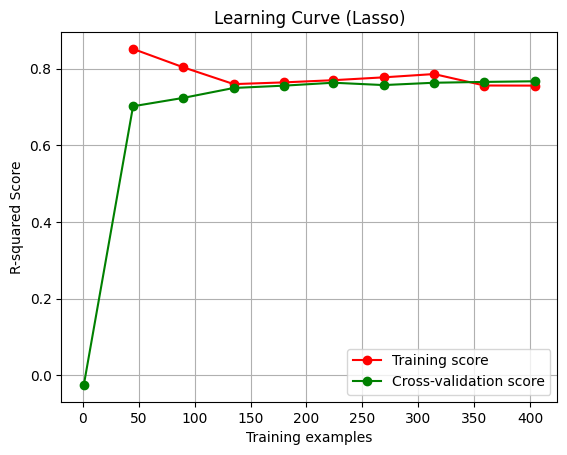

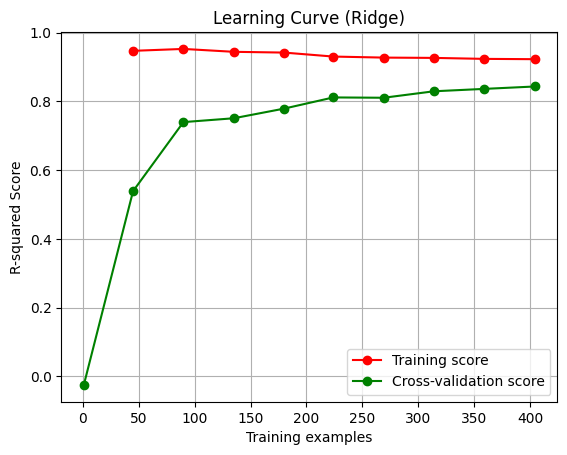

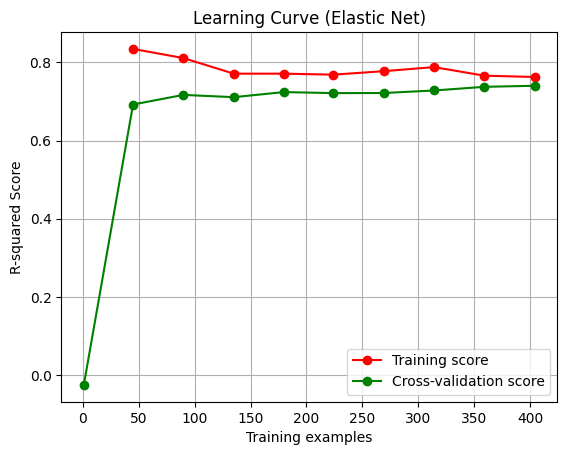

In [24]:
def plot_learning_curve(train_sizes, train_scores, test_scores, title):
    plt.figure()
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("R-squared Score")
    plt.grid()

    plt.plot(train_sizes, train_scores, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores, 'o-', color="g", label="Cross-validation score")
    plt.legend(loc="best")
    plt.show()

# Plot learning curves for each model
plot_learning_curve(sizes, train_r2_lasso, test_r2_lasso, "Learning Curve (Lasso)")
plot_learning_curve(sizes, train_r2_ridge, test_r2_ridge, "Learning Curve (Ridge)")
plot_learning_curve(sizes, train_r2_elastic_net, test_r2_elastic_net, "Learning Curve (Elastic Net)")